## Normality of the Target

- Shapiro-Wilk or Kolmogorov-Smirnov test
- test whether the target variable (ie Spotprice) is normally distributed
- could impact the suitability of parametric models (linear regression)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from load_dfs import load_spotprices

In [8]:
np.set_printoptions(suppress=True)

In [3]:
DK1spot=load_spotprices()

/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)


In [5]:
DK1spot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 4 to 61485
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HourUTC       8784 non-null   datetime64[ns]
 1   HourDK        8784 non-null   datetime64[ns]
 2   SpotPriceDKK  8784 non-null   float64       
 3   SpotPriceEUR  8784 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 343.1 KB


In [11]:
target=DK1spot['SpotPriceEUR']

## Shapiro-Wilk test

- if statistic is closer to 1 indicates normally distributed
- if p value > 0.05 fail to reject the null hypothesis, so not normally distributed

In [ ]:
shapiro_test = stats.shapiro(target)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

Shapiro-Wilk Test: Statistic=0.8388050473570045, p-value=3.480225246079837e-69


A large W value but a low p-value generally means that while the data appears to be close to normally distributed (as indicated by the W value), the sample size is large enough that even small deviations from normality are detected as statistically significant (as indicated by the low p-value).

In practical terms, this situation can arise when you have a large dataset. With large sample sizes, the Shapiro-Wilk test becomes very sensitive to even minor deviations from normality, which might not be practically significant.

## Q-Q plot

- help assess if a dataset follows a particular distribution, most commonly the normal distribution.

What a Q-Q Plot Means:
- Quantiles: The plot compares the quantiles of the sample data against the quantiles of a theoretical distribution (e.g., normal distribution).

Purpose: It helps to visually assess whether the sample data comes from the theoretical distribution.
What a Q-Q Plot Shows:
- X-axis: Theoretical quantiles from the specified distribution.
- Y-axis: Sample quantiles from the data.




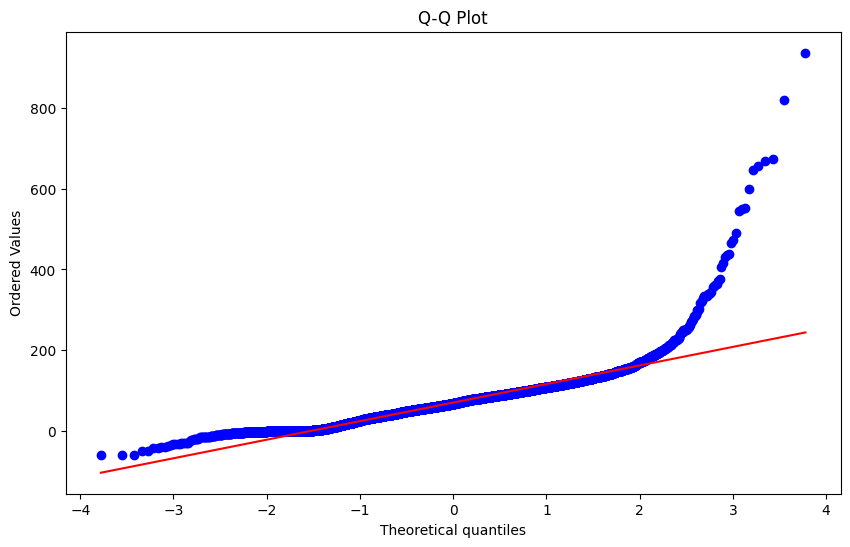

In [12]:
plt.figure(figsize=(10, 6))
stats.probplot(target, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

Interpretation:
- Straight Line: If the points fall approximately along a straight line (typically the 45-degree line), it suggests that the sample data follows the theoretical distribution.
- Deviations from Line: Deviations from the line indicate departures from the theoretical distribution.
    - S-shaped Curve: Indicates heavy tails (leptokurtic distribution).
    - Inverted S-shaped Curve: Indicates light tails (platykurtic distribution).
    - Systematic Deviations: Suggest skewness or other distributional differences.

## Plot distribution

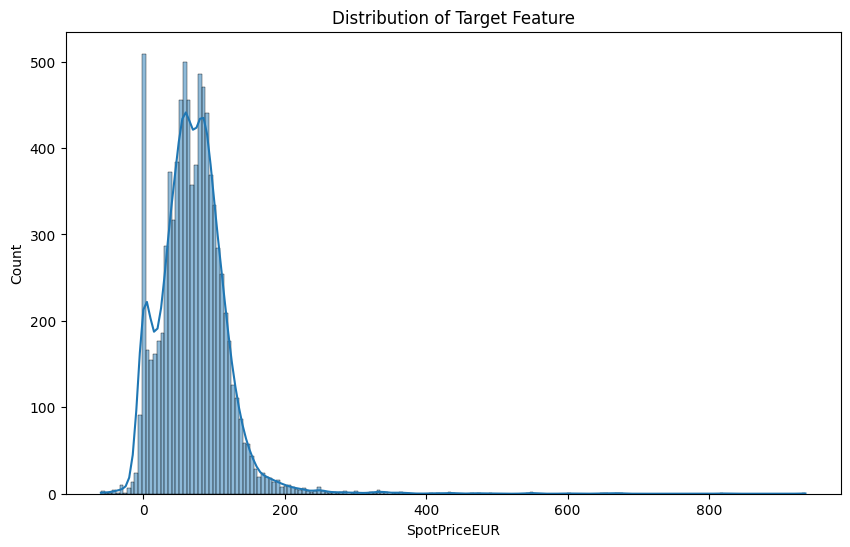

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(target, kde=True) #kernel density estimate
plt.title('Distribution of Target Feature')
plt.show()

## Conclusion:

Shapiro-Wilk test: low p value, but large W (statistic value), means that sample size is large enough that points are statistically significantly deviating from normal distribution

Q-Q plot: heavy tails and positively skewed, but middle values roughly follow a normal distribution - this lines up with the Shpario-Wilk test results

Histogram distribution: lot of points near 0, including a few negative values, and the right skewness is displayed